In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import string
from collections import Counter
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from keras.models import Sequential
from keras.preprocessing.text import Tokenizer
from keras.utils import pad_sequences,to_categorical, plot_model
from keras.layers import Embedding,Dense,LSTM,Bidirectional
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
import pydot
import graphviz

In [ ]:
data = pd.read_csv("goodreads_train.csv")
data

,user_id,book_id,review_id,rating,review_text,date_added,date_updated,read_at,started_at,n_votes,n_comments
0,8842281e1d1347389f2ab93d60773d4d,18245960,dfdbb7b0eb5a7e4c26d59a937e2e5feb,5,This is a special book. It started slow for ab...,Sun Jul 30 07:44:10 -0700 2017,Wed Aug 30 00:00:26 -0700 2017,Sat Aug 26 12:05:52 -0700 2017,Tue Aug 15 13:23:18 -0700 2017,28,1
1,8842281e1d1347389f2ab93d60773d4d,16981,a5d2c3628987712d0e05c4f90798eb67,3,Recommended by Don Katz. Avail for free in Dec...,Mon Dec 05 10:46:44 -0800 2016,Wed Mar 22 11:37:04 -0700 2017,NaN,NaN,1,0
2,8842281e1d1347389f2ab93d60773d4d,28684704,2ede853b14dc4583f96cf5d120af636f,3,"A fun, fast paced science fiction thriller. I ...",Tue Nov 15 11:29:22 -0800 2016,Mon Mar 20 23:40:27 -0700 2017,Sat Mar 18 23:22:42 -0700 2017,Fri Mar 17 23:45:40 -0700 2017,22,0
3,8842281e1d1347389f2ab93d60773d4d,27161156,ced5675e55cd9d38a524743f5c40996e,0,Recommended reading to understand what is goin...,Wed Nov 09 17:37:04 -0800 2016,Wed Nov 09 17:38:20 -0800 2016,NaN,NaN,5,1
4,8842281e1d1347389f2ab93d60773d4d,25884323,332732725863131279a8e345b63ac33e,4,"I really enjoyed this book, and there is a lot...",Mon Apr 25 09:31:23 -0700 2016,Mon Apr 25 09:31:23 -0700 2016,Sun Jun 26 00:00:00 -0700 2016,Sat May 28 00:00:00 -0700 2016,9,1
...,...,...,...,...,...,...,...,...,...,...,...
899995,b9450d1c1f97f891c392b1105959b56e,11832081,7c34c15ad8cb28a4afca32946e2016ea,3,3.5 stars. \n Jenna is a popular YA author and...,Fri Nov 16 22:10:17 -0800 2012,Sat Nov 17 22:42:44 -0800 2012,Sat Nov 17 00:00:00 -0800 2012,Fri Nov 16 00:00:00 -0800 2012,0,0
899996,b9450d1c1f97f891c392b1105959b56e,16095092,e979c735276431915d089cfaf446d64f,3,This was a quick read for me. I have read a lo...,Fri Nov 16 22:09:49 -0800 2012,Sat Nov 17 23:38:58 -0800 2012,Sat Nov 17 00:00:00 -0800 2012,Fri Nov 16 00:00:00 -0800 2012,1,1
899997,b9450d1c1f97f891c392b1105959b56e,8430896,feb9fe6439f9fbba8a1cce36020ad977,4,** spoiler alert ** \n 3.5 stars. \n This book...,Tue Nov 13 05:38:24 -0800 2012,Tue Nov 13 23:29:17 -0800 2012,Tue Nov 13 00:00:00 -0800 2012,Tue Nov 13 00:00:00 -0800 2012,1,0
899998,b9450d1c1f97f891c392b1105959b56e,12275680,741e29369f70531bfffbd02add86f228,4,** spoiler alert ** \n Another fun read from M...,Mon Nov 12 05:42:30 -0800 2012,Tue Nov 13 22:32:05 -0800 2012,Tue Nov 13 00:00:00 -0800 2012,Mon Nov 12 00:00:00 -0800 2012,0,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900000 entries, 0 to 899999
Data columns (total 11 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   user_id       900000 non-null  object
 1   book_id       900000 non-null  int64 
 2   review_id     900000 non-null  object
 3   rating        900000 non-null  int64 
 4   review_text   900000 non-null  object
 5   date_added    900000 non-null  object
 6   date_updated  900000 non-null  object
 7   read_at       808234 non-null  object
 8   started_at    625703 non-null  object
 9   n_votes       900000 non-null  int64 
 10  n_comments    900000 non-null  int64 
dtypes: int64(4), object(7)
memory usage: 75.5+ MB


In [ ]:
data.describe()

,book_id,rating,n_votes,n_comments
count,9.000000e+05,900000.000000,900000.000000,900000.000000
mean,1.344145e+07,3.689639,3.294381,1.016656
std,9.357863e+06,1.252583,17.873553,5.963821
min,1.000000e+00,0.000000,-3.000000,-1.000000
25%,6.340471e+06,3.000000,0.000000,0.000000
50%,1.344203e+07,4.000000,0.000000,0.000000
75%,2.057897e+07,5.000000,2.000000,0.000000
max,3.632868e+07,5.000000,3222.000000,1335.000000


In [ ]:
data.count()

user_id         900000
book_id         900000
review_id       900000
rating          900000
review_text     900000
date_added      900000
date_updated    900000
read_at         808234
started_at      625703
n_votes         900000
n_comments      900000
dtype: int64

In [ ]:

t1=data[data["rating"]==1].sample(n=10000,random_state=40)
t1["rating"]=0
t3=data[data["rating"]==3].sample(n=10000,random_state=40)
t3["rating"]=1
t5=data[data["rating"]==5].sample(n=10000,random_state=40)
t5["rating"]=2
sample_data=pd.concat([t1,t3,t5]).sample(frac=1)

In [ ]:
sample_data

,user_id,book_id,review_id,rating,review_text,date_added,date_updated,read_at,started_at,n_votes,n_comments
862673,ad320bacb172cba8191a7508a13930a3,18404427,cf50ba2c966735ed9903662a7dba70d3,0,"I tried to give this two stars, but the more I...",Thu Mar 20 12:22:05 -0700 2014,Thu Jun 29 14:58:26 -0700 2017,Wed Jul 02 00:00:00 -0700 2014,Mon Jun 30 00:00:00 -0700 2014,51,9
753172,7756ba463b0761e9e501fc95523fda8f,13519397,407a3410ea5c0f2c8a9ede0f4a18b3cb,1,I don't really know how to rate this book. On ...,Thu Nov 26 00:49:09 -0800 2015,Thu Jan 28 01:38:19 -0800 2016,Thu Nov 26 00:00:00 -0800 2015,Wed Nov 25 00:00:00 -0800 2015,0,0
527794,9e7c45b6ad5ed33122310186e66c7ca1,13089710,b2457499a78c16b487f8ffe2367f5118,0,what even is this book? \n was it even necessa...,Sun Aug 04 14:10:37 -0700 2013,Sun Aug 25 07:18:42 -0700 2013,Thu Aug 01 00:00:00 -0700 2013,NaN,0,0
577322,f437dff42e6722051a8b5c9eb885eb7d,2998814,365b2902736830135313af8c441e6d31,0,ugh. \n i tried to finish this book. i really ...,Wed Sep 15 16:53:39 -0700 2010,Thu Oct 28 17:21:19 -0700 2010,Thu Oct 28 00:00:00 -0700 2010,Wed Oct 20 00:00:00 -0700 2010,0,0
49996,9910aa4858a762300ea81224caccaa37,7094569,84e730d9356d3bb34b1cbc7ea0fc4567,2,"Zombies, blogging, and presidential campaignin...",Tue Oct 05 09:30:29 -0700 2010,Tue Oct 05 09:36:45 -0700 2010,NaN,NaN,0,0
...,...,...,...,...,...,...,...,...,...,...,...
686888,e0d1ef7c1276042d2d63b752cdeab71f,17834122,64f7b3b9090fce630c57874984ac6738,2,Full review to come with book 2,Wed Oct 21 10:43:43 -0700 2015,Wed Dec 30 12:48:42 -0800 2015,Fri Oct 23 15:32:48 -0700 2015,Wed Oct 21 00:00:00 -0700 2015,9,0
229238,b0ed09d14a462cb2d27327b87edf6f68,7516001,8252a4ae14841cc9534bccf5b7c78b53,0,"Good idea, but it just doesn't work. \n I like...",Tue May 03 06:08:12 -0700 2011,Thu Nov 24 10:17:45 -0800 2016,NaN,Tue May 03 00:00:00 -0700 2011,3,0
217058,3b03b0e3350e312351cb0c5e7899a1f0,1662589,b7c3b5e6927220643fdb716435b51f34,2,"For a full review, check the Bitten by Books w...",Fri Jan 09 11:01:10 -0800 2009,Wed Jan 19 15:55:49 -0800 2011,Sun Apr 04 00:00:00 -0700 2010,Tue Mar 30 00:00:00 -0700 2010,8,15
658315,56570f1034d9801c30a6a7ddff1dab2d,17675462,840110d417620c9a809ef3f3d3bb7d4b,1,"Actual Rating: 3.5 stars \n I must say, I got ...",Fri Dec 12 13:38:20 -0800 2014,Sat Dec 20 15:03:45 -0800 2014,NaN,NaN,2,0


In [ ]:
sample_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30000 entries, 862673 to 695992
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   user_id       30000 non-null  object
 1   book_id       30000 non-null  int64 
 2   review_id     30000 non-null  object
 3   rating        30000 non-null  int64 
 4   review_text   30000 non-null  object
 5   date_added    30000 non-null  object
 6   date_updated  30000 non-null  object
 7   read_at       26286 non-null  object
 8   started_at    20270 non-null  object
 9   n_votes       30000 non-null  int64 
 10  n_comments    30000 non-null  int64 
dtypes: int64(4), object(7)
memory usage: 2.7+ MB


In [ ]:
nltk.download('punkt')
nltk.download("stopwords")
stop_words = set(stopwords.words("english"))

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\roopa\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\roopa\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
def preprocess_text(sample_data):
    sample_data = sample_data.lower() #lower case
    sample_data = " ".join(word for word in sample_data.split() if word not in stop_words) #stopwords removal
    return sample_data


In [ ]:
sample_data['review_text'] = sample_data['review_text'].apply(preprocess_text)
sample_data.head(5)

,user_id,book_id,review_id,rating,review_text,date_added,date_updated,read_at,started_at,n_votes,n_comments
862673,ad320bacb172cba8191a7508a13930a3,18404427,cf50ba2c966735ed9903662a7dba70d3,0,"tried give two stars, think it, worse seems, t...",Thu Mar 20 12:22:05 -0700 2014,Thu Jun 29 14:58:26 -0700 2017,Wed Jul 02 00:00:00 -0700 2014,Mon Jun 30 00:00:00 -0700 2014,51,9
753172,7756ba463b0761e9e501fc95523fda8f,13519397,407a3410ea5c0f2c8a9ede0f4a18b3cb,1,really know rate book. one hand loved storylin...,Thu Nov 26 00:49:09 -0800 2015,Thu Jan 28 01:38:19 -0800 2016,Thu Nov 26 00:00:00 -0800 2015,Wed Nov 25 00:00:00 -0800 2015,0,0
527794,9e7c45b6ad5ed33122310186e66c7ca1,13089710,b2457499a78c16b487f8ffe2367f5118,0,even book? even necessary??? idk like it. felt...,Sun Aug 04 14:10:37 -0700 2013,Sun Aug 25 07:18:42 -0700 2013,Thu Aug 01 00:00:00 -0700 2013,NaN,0,0
577322,f437dff42e6722051a8b5c9eb885eb7d,2998814,365b2902736830135313af8c441e6d31,0,"ugh. tried finish book. really did. but, matte...",Wed Sep 15 16:53:39 -0700 2010,Thu Oct 28 17:21:19 -0700 2010,Thu Oct 28 00:00:00 -0700 2010,Wed Oct 20 00:00:00 -0700 2010,0,0
49996,9910aa4858a762300ea81224caccaa37,7094569,84e730d9356d3bb34b1cbc7ea0fc4567,2,"zombies, blogging, presidential campaigning br...",Tue Oct 05 09:30:29 -0700 2010,Tue Oct 05 09:36:45 -0700 2010,NaN,NaN,0,0


In [ ]:
import re
sample_data.loc[:,"review_text"]=sample_data.loc[:,"review_text"].apply(lambda word: re.sub('[^a-z A-Z 0-9-]+','',word))
sample_data.head(5)
#punctuations are removed

,user_id,book_id,review_id,rating,review_text,date_added,date_updated,read_at,started_at,n_votes,n_comments
862673,ad320bacb172cba8191a7508a13930a3,18404427,cf50ba2c966735ed9903662a7dba70d3,0,tried give two stars think it worse seems thin...,Thu Mar 20 12:22:05 -0700 2014,Thu Jun 29 14:58:26 -0700 2017,Wed Jul 02 00:00:00 -0700 2014,Mon Jun 30 00:00:00 -0700 2014,51,9
753172,7756ba463b0761e9e501fc95523fda8f,13519397,407a3410ea5c0f2c8a9ede0f4a18b3cb,1,really know rate book one hand loved storyline...,Thu Nov 26 00:49:09 -0800 2015,Thu Jan 28 01:38:19 -0800 2016,Thu Nov 26 00:00:00 -0800 2015,Wed Nov 25 00:00:00 -0800 2015,0,0
527794,9e7c45b6ad5ed33122310186e66c7ca1,13089710,b2457499a78c16b487f8ffe2367f5118,0,even book even necessary idk like it felt poin...,Sun Aug 04 14:10:37 -0700 2013,Sun Aug 25 07:18:42 -0700 2013,Thu Aug 01 00:00:00 -0700 2013,NaN,0,0
577322,f437dff42e6722051a8b5c9eb885eb7d,2998814,365b2902736830135313af8c441e6d31,0,ugh tried finish book really did but matter ha...,Wed Sep 15 16:53:39 -0700 2010,Thu Oct 28 17:21:19 -0700 2010,Thu Oct 28 00:00:00 -0700 2010,Wed Oct 20 00:00:00 -0700 2010,0,0
49996,9910aa4858a762300ea81224caccaa37,7094569,84e730d9356d3bb34b1cbc7ea0fc4567,2,zombies blogging presidential campaigning bril...,Tue Oct 05 09:30:29 -0700 2010,Tue Oct 05 09:36:45 -0700 2010,NaN,NaN,0,0


In [ ]:
#lemmatization
nltk.download('wordnet')
nltk.download('omw-1.4')
lemmatizer = WordNetLemmatizer()
def lemmatize_text(text):
  tokens = word_tokenize(text)
  tokens = [word for word in tokens if word not in stop_words]
  lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]
  lemmatized_text = " ".join(lemmatized_tokens)
  return lemmatized_text

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\roopa\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\roopa\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [ ]:
sample_data['lemmatized_text'] = sample_data['review_text'].apply(lemmatize_text)
sample_data

,user_id,book_id,review_id,rating,review_text,date_added,date_updated,read_at,started_at,n_votes,n_comments,lemmatized_text
862673,ad320bacb172cba8191a7508a13930a3,18404427,cf50ba2c966735ed9903662a7dba70d3,0,tried give two stars think it worse seems thin...,Thu Mar 20 12:22:05 -0700 2014,Thu Jun 29 14:58:26 -0700 2017,Wed Jul 02 00:00:00 -0700 2014,Mon Jun 30 00:00:00 -0700 2014,51,9,tried give two star think worse seems think de...
753172,7756ba463b0761e9e501fc95523fda8f,13519397,407a3410ea5c0f2c8a9ede0f4a18b3cb,1,really know rate book one hand loved storyline...,Thu Nov 26 00:49:09 -0800 2015,Thu Jan 28 01:38:19 -0800 2016,Thu Nov 26 00:00:00 -0800 2015,Wed Nov 25 00:00:00 -0800 2015,0,0,really know rate book one hand loved storyline...
527794,9e7c45b6ad5ed33122310186e66c7ca1,13089710,b2457499a78c16b487f8ffe2367f5118,0,even book even necessary idk like it felt poin...,Sun Aug 04 14:10:37 -0700 2013,Sun Aug 25 07:18:42 -0700 2013,Thu Aug 01 00:00:00 -0700 2013,NaN,0,0,even book even necessary idk like felt pointle...
577322,f437dff42e6722051a8b5c9eb885eb7d,2998814,365b2902736830135313af8c441e6d31,0,ugh tried finish book really did but matter ha...,Wed Sep 15 16:53:39 -0700 2010,Thu Oct 28 17:21:19 -0700 2010,Thu Oct 28 00:00:00 -0700 2010,Wed Oct 20 00:00:00 -0700 2010,0,0,ugh tried finish book really matter hard try m...
49996,9910aa4858a762300ea81224caccaa37,7094569,84e730d9356d3bb34b1cbc7ea0fc4567,2,zombies blogging presidential campaigning bril...,Tue Oct 05 09:30:29 -0700 2010,Tue Oct 05 09:36:45 -0700 2010,NaN,NaN,0,0,zombie blogging presidential campaigning brill...
...,...,...,...,...,...,...,...,...,...,...,...,...
686888,e0d1ef7c1276042d2d63b752cdeab71f,17834122,64f7b3b9090fce630c57874984ac6738,2,full review come book 2,Wed Oct 21 10:43:43 -0700 2015,Wed Dec 30 12:48:42 -0800 2015,Fri Oct 23 15:32:48 -0700 2015,Wed Oct 21 00:00:00 -0700 2015,9,0,full review come book 2
229238,b0ed09d14a462cb2d27327b87edf6f68,7516001,8252a4ae14841cc9534bccf5b7c78b53,0,good idea work like carrie vaughn like book ti...,Tue May 03 06:08:12 -0700 2011,Thu Nov 24 10:17:45 -0800 2016,NaN,Tue May 03 00:00:00 -0700 2011,3,0,good idea work like carrie vaughn like book ti...
217058,3b03b0e3350e312351cb0c5e7899a1f0,1662589,b7c3b5e6927220643fdb716435b51f34,2,full review check bitten books website httpwww...,Fri Jan 09 11:01:10 -0800 2009,Wed Jan 19 15:55:49 -0800 2011,Sun Apr 04 00:00:00 -0700 2010,Tue Mar 30 00:00:00 -0700 2010,8,15,full review check bitten book website httpwwwb...
658315,56570f1034d9801c30a6a7ddff1dab2d,17675462,840110d417620c9a809ef3f3d3bb7d4b,1,actual rating 35 stars must say got rather bor...,Fri Dec 12 13:38:20 -0800 2014,Sat Dec 20 15:03:45 -0800 2014,NaN,NaN,2,0,actual rating 35 star must say got rather bore...


In [ ]:
#Most common words
all_words = " ".join(sample_data['review_text']).split()
word_counts = Counter(all_words)
print("Most common words:", word_counts.most_common(50))


Most common words: [('book', 60903), ('like', 28920), ('one', 25045), ('read', 24691), ('really', 21743), ('story', 21012), ('it', 17227), ('love', 17047), ('characters', 16036), ('im', 14898), ('much', 14632), ('would', 14221), ('even', 14159), ('get', 13055), ('time', 12375), ('first', 12236), ('know', 11791), ('-', 11445), ('think', 11029), ('good', 10959), ('books', 10850), ('way', 10822), ('series', 10760), ('also', 10525), ('reading', 10261), ('me', 10160), ('character', 9275), ('could', 9114), ('well', 8544), ('people', 8420), ('going', 8273), ('things', 8163), ('loved', 8090), ('see', 7991), ('end', 7973), ('still', 7791), ('little', 7476), ('never', 7315), ('life', 7211), ('plot', 7115), ('want', 7024), ('cant', 6975), ('something', 6906), ('made', 6888), ('make', 6861), ('felt', 6849), ('world', 6845), ('two', 6779), ('feel', 6771), ('say', 6548)]


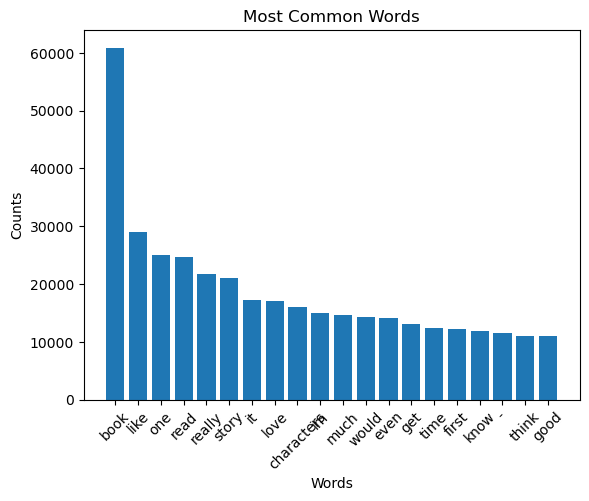

In [ ]:
# Visualizing the data

words = [word for word, count in word_counts.most_common(20)]
counts = [count for word, count in word_counts.most_common(20)]
plt.bar(words, counts)
plt.xlabel("Words")
plt.ylabel("Counts")
plt.title("Most Common Words")
plt.xticks(rotation=45)
plt.show()

In [ ]:
#tokenization

tokenizer=Tokenizer(num_words=3000)
tokenizer.fit_on_texts(sample_data['review_text'])
x= tokenizer.texts_to_sequences(sample_data['review_text'])
x=pad_sequences(x,maxlen=500)

862673    tried give two stars think it worse seems thin...
753172    really know rate book one hand loved storyline...
527794    even book even necessary idk like it felt poin...
577322    ugh tried finish book really did but matter ha...
49996     zombies blogging presidential campaigning bril...
Name: review_text, dtype: object
[[399, 98, 44, 75, 19, 8, 598, 193, 19, 1274, 151, 242, 10, 2982, 34, 305, 497, 820, 5, 2, 1, 4, 1764, 1401, 60, 476, 476, 52, 684, 279, 65, 4, 971, 21, 52, 182, 12, 1134, 304, 2, 84, 476, 52, 5, 148, 377, 60, 155, 18, 52, 16, 142, 2370, 225, 21, 2924, 2541, 15, 1110, 30, 87, 731, 48, 288, 294, 293, 204, 465, 962, 119, 325, 279, 564, 202, 512, 512, 75, 225, 225, 294, 325, 149, 222, 67, 1280, 117, 54, 173, 18, 698, 12, 409, 2884, 279, 2843, 342, 443, 190, 98, 756, 1007, 56, 82, 1616, 1185, 266, 44, 364, 28, 5, 211, 108, 1984, 671, 682, 166, 972, 47, 70, 1804, 70, 1007, 28, 1188, 144, 1213, 2391, 1247, 646, 243, 289, 857, 149, 167, 49, 1435, 32, 463, 266, 105, 

In [ ]:
y=sample_data["rating"]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.65)

In [ ]:
y_train

14554     1
749798    1
415108    2
798170    0
669270    0
         ..
45402     2
413283    2
226724    0
821821    1
754693    0
Name: rating, Length: 10500, dtype: int64

In [ ]:
y_train = to_categorical(y_train, num_classes=3)
y_test = to_categorical(y_test, num_classes=3)

In [ ]:
#model
model=Sequential()
model.add(Embedding(input_dim=3000,output_dim=32,input_length=x_train.shape[1]))
model.add(Bidirectional(LSTM(32,dropout=0.2,recurrent_dropout=0.2)))
model.add(Dense(3,activation="softmax"))
model.compile(loss="categorical_crossentropy",optimizer="adam",metrics=["accuracy","mse","mae"])
print(model.summary())


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 500, 32)           96000     
                                                                 
 bidirectional (Bidirectiona  (None, 64)               16640     
 l)                                                              
                                                                 
 dense (Dense)               (None, 3)                 195       
                                                                 
Total params: 112,835
Trainable params: 112,835
Non-trainable params: 0
_________________________________________________________________
None


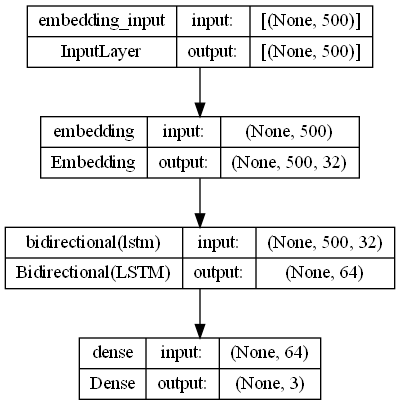

In [ ]:
 plot_model(model,to_file='model.png',show_shapes=True)

In [ ]:
model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=5,batch_size=64)

Epoch 1/5
165/165 [==============================] - 92s 531ms/step - loss: 0.9529 - accuracy: 0.5075 - mse: 0.1912 - mae: 0.3942 - val_loss: 0.7938 - val_accuracy: 0.6368 - val_mse: 0.1589 - val_mae: 0.3376
Epoch 2/5
165/165 [==============================] - 86s 524ms/step - loss: 0.6369 - accuracy: 0.7296 - mse: 0.1254 - mae: 0.2634 - val_loss: 0.6656 - val_accuracy: 0.7207 - val_mse: 0.1286 - val_mae: 0.2496
Epoch 3/5
165/165 [==============================] - 87s 527ms/step - loss: 0.4986 - accuracy: 0.8016 - mse: 0.0952 - mae: 0.1990 - val_loss: 0.6394 - val_accuracy: 0.7416 - val_mse: 0.1217 - val_mae: 0.2216
Epoch 4/5
165/165 [==============================] - 87s 527ms/step - loss: 0.4334 - accuracy: 0.8306 - mse: 0.0813 - mae: 0.1691 - val_loss: 0.6661 - val_accuracy: 0.7376 - val_mse: 0.1248 - val_mae: 0.2144
Epoch 5/5
165/165 [==============================] - 87s 529ms/step - loss: 0.3923 - accuracy: 0.8496 - mse: 0.0731 - mae: 0.1503 - val_loss: 0.7058 - val_accuracy: 0.7

In [ ]:
scores= model.evaluate(x_test,y_test,verbose=1)

610/610 [==============================] - 36s 59ms/step - loss: 0.7058 - accuracy: 0.7334 - mse: 0.1297 - mae: 0.2090
accuracy:73.34%


In [ ]:
print("accuracy:%.2f%%"%(scores[1]*100))

accuracy:73.34%
